In [4]:
def predict(x,w,b):
    return x*w + b


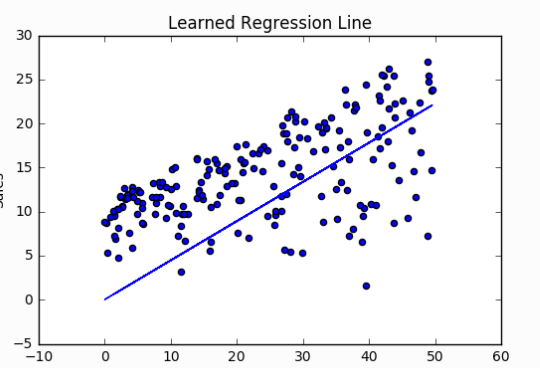

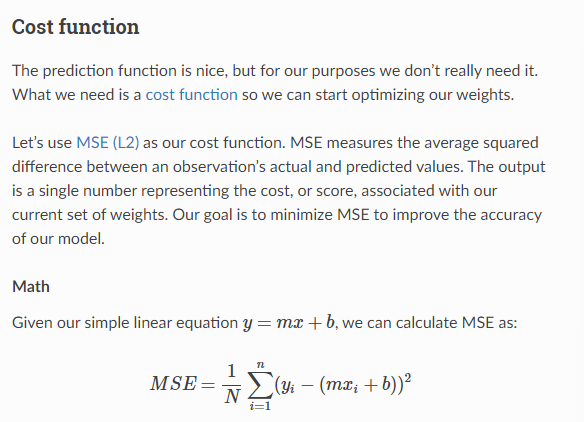

In [100]:
def cost_function(x,y,w,b):
    total_error = 0.0
    for i in range(len(x)):
        total_error += (y[i] - (w*x[i] +b)**2)
    return total_error / len(x)

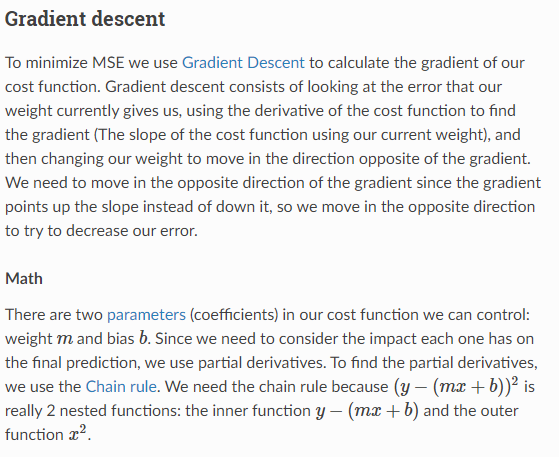
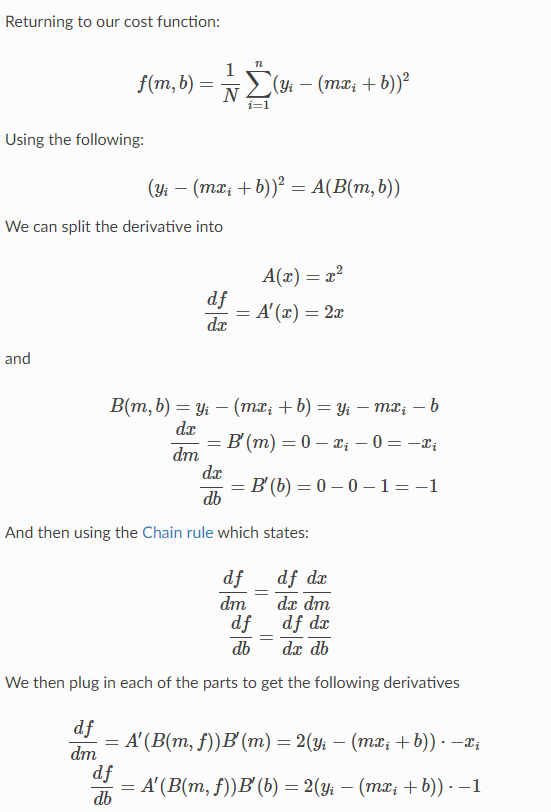
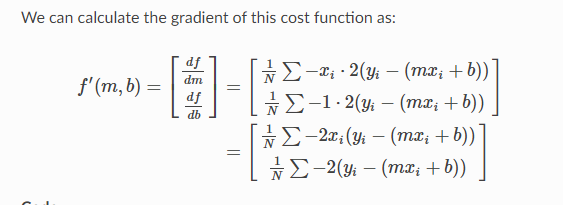

In [103]:
def update_weights(x,y,w=None,b=None,lr=0.001):
    weight_deriv = 0
    bias_deriv = 0
    
    for i in range(len(x)):
        # -2x(y - (mx + b))
        weight_deriv += (-2* x[i] * (y[i] - (w*x[i]+b)))
                        
        # -2(y - (mx + b))
        bias_deriv += (-2*(y[i] - (w*x[i]+b)))
                       
    w -= (weight_deriv / len(x))*lr
    b -= (bias_deriv / len(x))*lr
    
    return w,b

## Training
Before training we need to initialize our weights (set default values), set our hyperparameters (learning rate and number of iterations), and prepare to log our progress over each iteration.

In [104]:
def train(x,y,w=None,b=None,lr=0.001,iters=1000):
    cost_history = []
    
    
    for i in range(iters):
        w,b = update_weights(x,y,w,b,lr)
        cost = cost_function(x,y,w,b)
        cost_history.append(cost)
        
        if i%10 == 0:
            print(f"iter = {i}    weight= {w}    bias= {b}    cost= {cost}")
            
    return w,b,cost_history
        

## Model evaluation
Dataset

In [105]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [106]:
X, y = datasets.make_regression(n_samples = 100, n_features = 1,noise=20, random_state = 4)
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 2023)

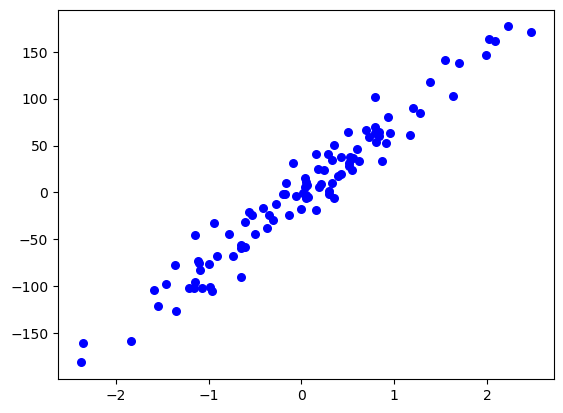

In [107]:
plt.scatter(X[:,0],y,color = 'b' , marker = 'o' , s = 30)
plt.show()

In [108]:
X_train.shape

(80, 1)

In [109]:
y_train.shape

(80,)

In [152]:
w,b,ch = train(x=X_train ,y= y_train ,w= 0, b=0,lr=0.001,iters=100)

iter = 0    weight= [0.14198668]    bias= [0.00921914]    cost= [4.5901726]
iter = 10    weight= [1.54702743]    bias= [0.09962914]    cost= [2.30705217]
iter = 20    weight= [2.92547049]    bias= [0.18686383]    cost= [-3.62316793]
iter = 30    weight= [4.2778208]    bias= [0.27101235]    cost= [-12.99171806]
iter = 40    weight= [5.6045737]    bias= [0.35216155]    cost= [-25.59909076]
iter = 50    weight= [6.90621507]    bias= [0.43039608]    cost= [-41.25466299]
iter = 60    weight= [8.18322155]    bias= [0.50579843]    cost= [-59.77633326]
iter = 70    weight= [9.43606073]    bias= [0.578449]    cost= [-80.99017309]
iter = 80    weight= [10.66519127]    bias= [0.64842612]    cost= [-104.7300922]
iter = 90    weight= [11.8710631]    bias= [0.71580612]    cost= [-130.83751694]


In [143]:
predicted = predict(X_test,w[-1],b[-1])

In [ ]:
predicted

In [145]:
len(predicted)

20

In [140]:
def mse(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)

In [ ]:
print("mse= ", mse(y_test,predicted))